In [1]:
import pandas as pd

 # pandas 透视表概述

- 数据透视表（Pivot Table）是一种交互式的表，可以进行某些计算，如求和与计数等。
- 所进行的计算与数据跟数据透视表中的排列有关。

- 之所以称为数据透视表，是因为可以动态地改变它们的版面布置，以便按照不同方式分析数据，也可以重新安排行号、列标和页字段。每一次改变版面布置时，数据透视表会立即按照新的布置重新计算数据。另外，如果原始数据发生更改，则可以更新数据透视表。

In [2]:
# pandas pivot_table 函数介绍：

# 方法  说明
# pd.pivot_table(df, ...)  进行透视表操作
# df.pivot_table(...)  进行透视表操作

# 零售会员数据分析案例

## 案例业务介绍

- 业务背景介绍：

- 1）某女鞋连锁零售企业，当前业务以线下门店为主，线上销售为辅

- 2）通过对会员的注册数据以及消费数据的分析，监控会员运营情况，为后续会员运营提供决策依据

- 3）会员等级说明

    - 白银：注册(0)
    - 黄金：下单(1~3888)
    - 铂金： 3888~6888
    - 钻石：6888以上

- 数据分析要达成的目标：

- 1）描述性数据分析

- 2）使用业务数据，分析出会员运营的基本情况

- 案例中用到的数据：

1）会员信息查询.xlsx

2）会员消费报表.xlsx

3）门店信息表.xlsx

4）全国销售订单数量表.xlsx

- 分析会员运营的基本情况：

1）从量的角度分析会员运营情况

- 整体会员运营情况（存量，增量）
- 不同渠道（线上，线下）的会员运营情况
- 线下业务，拆解到不同的地区、门店会员运营情况
2）从质的角度分析会员运营情况

- 会销比
- 连带率
- 复购率

## 会员存量、增量分析

In [3]:
# 每月存量、增量是最基本的指标，通过会员数量考察会员运营情况

### 用到的数据：会员信息查询.xlsx，加载 会员信息查询.xlsx 数据

In [4]:
member_df = pd.read_excel('./data/会员信息查询.xlsx')
member_df

,会员卡号,会员等级,会员来源,注册时间,所属店铺编码,门店店员编码,省份,城市,性别,生日,年齡,生命级别
0,BL6099033963550303769,黄金会员,线下扫码,2019-03-31 23:55:03.977,DPXX07,NaN,NaN,NaN,女,1975-04-04,43.0,活跃
1,BL6099033963450303763,黄金会员,线下扫码,2019-03-31 23:45:03.005,DPXX07,NaN,NaN,NaN,女,1982-04-02,36.0,活跃
2,BL6099033963464003767,白银会员,电商入口,2019-03-31 23:42:40.073,DPS00X,NaN,NaN,NaN,女,1988-08-13,30.0,沉睡
3,BL6099033963460503766,黄金会员,线下扫码,2019-03-31 23:42:05.516,DPXX07,NaN,NaN,NaN,女,1993-11-24,25.0,活跃
4,BL6099033963660603765,白银会员,电商入口,2019-03-31 23:26:02.402,DPS00X,NaN,NaN,NaN,女,1993-03-20,26.0,沉睡
...,...,...,...,...,...,...,...,...,...,...,...,...
952709,HS346696JA9D,钻石会员,线下扫码,2017-08-03 00:00:00.000,DPX753,NaN,河北省,唐山市,女,1971-09-17,47.0,活跃
952710,HS367073JA96,钻石会员,线下扫码,2017-08-03 00:00:00.000,DPX76X,NaN,四川省,成都市,女,1982-12-12,36.0,活跃
952711,HS353666JAD9,钻石会员,线下扫码,2017-08-03 00:00:00.000,DPX765,NaN,NaN,NaN,女,1970-04-28,48.0,活跃
952712,SB035933JA46,钻石会员,线下扫码,2017-08-03 00:00:00.000,DPX784,NaN,NaN,NaN,女,1968-03-09,51.0,互动


In [5]:
member_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952714 entries, 0 to 952713
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   会员卡号    952714 non-null  object        
 1   会员等级    952714 non-null  object        
 2   会员来源    952714 non-null  object        
 3   注册时间    952714 non-null  datetime64[ns]
 4   所属店铺编码  952714 non-null  object        
 5   门店店员编码  253828 non-null  object        
 6   省份      264801 non-null  object        
 7   城市      264758 non-null  object        
 8   性别      952714 non-null  object        
 9   生日      785590 non-null  object        
 10  年齡      952705 non-null  float64       
 11  生命级别    952714 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(10)
memory usage: 87.2+ MB


In [6]:
# 会员信息查询
member_df.head()

,会员卡号,会员等级,会员来源,注册时间,所属店铺编码,门店店员编码,省份,城市,性别,生日,年齡,生命级别
0,BL6099033963550303769,黄金会员,线下扫码,2019-03-31 23:55:03.977,DPXX07,NaN,NaN,NaN,女,1975-04-04,43.0,活跃
1,BL6099033963450303763,黄金会员,线下扫码,2019-03-31 23:45:03.005,DPXX07,NaN,NaN,NaN,女,1982-04-02,36.0,活跃
2,BL6099033963464003767,白银会员,电商入口,2019-03-31 23:42:40.073,DPS00X,NaN,NaN,NaN,女,1988-08-13,30.0,沉睡
3,BL6099033963460503766,黄金会员,线下扫码,2019-03-31 23:42:05.516,DPXX07,NaN,NaN,NaN,女,1993-11-24,25.0,活跃
4,BL6099033963660603765,白银会员,电商入口,2019-03-31 23:26:02.402,DPS00X,NaN,NaN,NaN,女,1993-03-20,26.0,沉睡


### 需要按月统计注册的会员数量，注册时间原始数据需要处理成年-月的形式

In [7]:
from datetime import datetime

In [8]:
member_df.loc[:,'注册年月'] = member_df['注册时间'].apply(lambda x: datetime.strftime(x,'%Y-%m'))
member_df.head()

,会员卡号,会员等级,会员来源,注册时间,所属店铺编码,门店店员编码,省份,城市,性别,生日,年齡,生命级别,注册年月
0,BL6099033963550303769,黄金会员,线下扫码,2019-03-31 23:55:03.977,DPXX07,NaN,NaN,NaN,女,1975-04-04,43.0,活跃,2019-03
1,BL6099033963450303763,黄金会员,线下扫码,2019-03-31 23:45:03.005,DPXX07,NaN,NaN,NaN,女,1982-04-02,36.0,活跃,2019-03
2,BL6099033963464003767,白银会员,电商入口,2019-03-31 23:42:40.073,DPS00X,NaN,NaN,NaN,女,1988-08-13,30.0,沉睡,2019-03
3,BL6099033963460503766,黄金会员,线下扫码,2019-03-31 23:42:05.516,DPXX07,NaN,NaN,NaN,女,1993-11-24,25.0,活跃,2019-03
4,BL6099033963660603765,白银会员,电商入口,2019-03-31 23:26:02.402,DPS00X,NaN,NaN,NaN,女,1993-03-20,26.0,沉睡,2019-03


### 按注册年月统计会员增量

In [9]:
month_count = member_df.groupby('注册年月')[['会员卡号']].count()
month_count.head()

,会员卡号
注册年月,
2017-08,392910
2017-09,760
2017-10,996
2017-11,1710
2017-12,4165


透视表实现：

- index：行索引，传入原始数据的列名
- columns：列索引，传入原始数据的列名
- values: 要做聚合操作的列名
- aggfunc：聚合函数

In [10]:
month_count = member_df.pivot_table(index='注册年月',values='会员卡号',aggfunc='count')
month_count.head()

,会员卡号
注册年月,
2017-08,392910
2017-09,760
2017-10,996
2017-11,1710
2017-12,4165


In [11]:
# 修改列标签
month_count.columns = ['月增量']
month_count.head()

,月增量
注册年月,
2017-08,392910
2017-09,760
2017-10,996
2017-11,1710
2017-12,4165


### 在月增量数据的基础上统计月存量

In [12]:
# 通过cumsum对月增量做累积求和
month_count.loc[:,'存量'] = month_count['月增量'].cumsum()
month_count

,月增量,存量
注册年月,,
2017-08,392910,392910
2017-09,760,393670
2017-10,996,394666
2017-11,1710,396376
2017-12,4165,400541
2018-01,15531,416072
2018-02,13798,429870
2018-03,49320,479190
2018-04,71699,550889


### 从结果中剔除 2017-08 月份的数据

In [13]:
month_count = month_count[1:]
month_count.head()

,月增量,存量
注册年月,,
2017-09,760,393670
2017-10,996,394666
2017-11,1710,396376
2017-12,4165,400541
2018-01,15531,416072


In [14]:
month_count[1:]

,月增量,存量
注册年月,,
2017-10,996,394666
2017-11,1710,396376
2017-12,4165,400541
2018-01,15531,416072
2018-02,13798,429870
2018-03,49320,479190
2018-04,71699,550889
2018-05,27009,577898
2018-06,17718,595616


### 对上面的统计结果进行可视化

Text(0.5, 1.0, '会员存量增量分析')

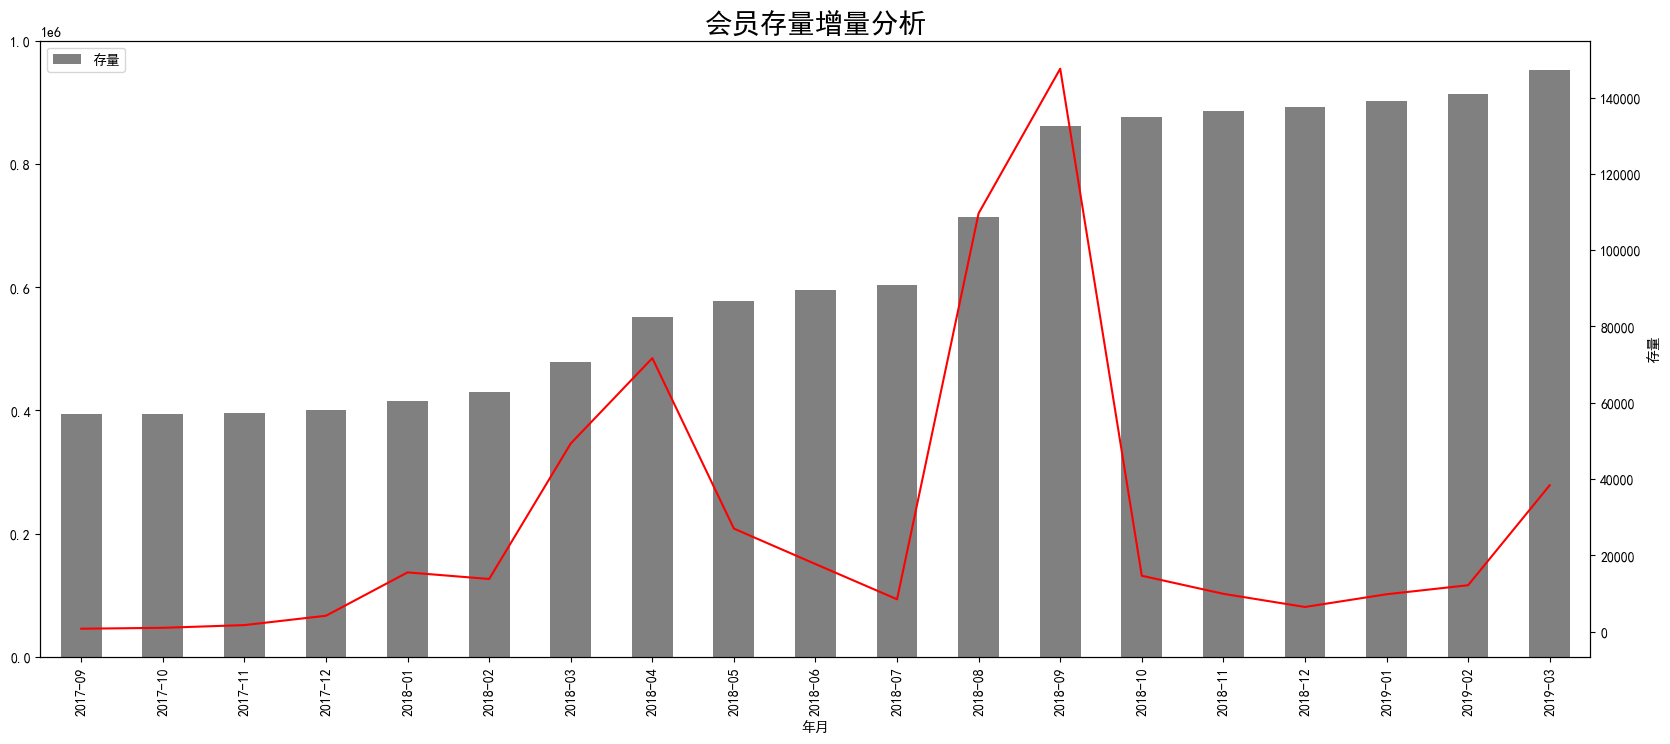

In [15]:
import matplotlib.pyplot as plt
# Win操作系统设置字体
plt.rcParams['font.sans-serif'] = 'SimHei'
month_count['月增量'].plot(figsize=(20,8),color='red',secondary_y=True)
month_count['存量'].plot.bar(figsize=(20,8),color='grey',xlabel='年月',ylabel='存量',legend=True)
plt.title('会员存量增量分析',fontsize=20)

## 增量等级分布

- 会员增量存量不能真实反映会员运营的质量，需要对会员的增量存量数据做进一步拆解

- 从哪些维度来拆解？

1）从指标构成来拆解

- 会员 = 白银会员+黄金会员+铂金会员+钻石会员
2）从业务流程来拆解

- 当前案例，业务分线上、线下，又可以进一步拆解：按大区，按门店

- 会员等级分布分析的目的和要分析的指标：

1）会员按照等级拆解分为

- 白银: 注册(0)
- 黄金: 下单(1~3888)
- 铂金: 3888~6888
- 钻石: 6888以上
2）由于会员等级跟消费金额挂钩，所以会员等级分布分析可以说明会员的质量

### 按照注册年月和会员等级，统计会员增量

In [16]:
month_degree_count = member_df.groupby(['注册年月','会员等级'])[['会员卡号']].count()
month_degree_count

会员卡号
注册年月    会员等级        
2017-08 白银会员  376648
        钻石会员     185
        铂金会员     387
        黄金会员   15690
2017-09 白银会员     530
...              ...
2019-02 黄金会员    8140
2019-03 白银会员   10580
        钻石会员       3
        铂金会员      37
        黄金会员   27752

[80 rows x 1 columns]

In [17]:
# 进行unstack操作
month_degree_count.unstack()

会员卡号                 
会员等级       白银会员 钻石会员 铂金会员   黄金会员
注册年月                            
2017-08  376648  185  387  15690
2017-09     530    3   10    217
2017-10     603   13   17    363
2017-11    1311   19   20    360
2017-12    3512   15   24    614
2018-01   11244   24   64   4199
2018-02    9937    9   34   3818
2018-03   41546   57   94   7623
2018-04   62613   48   83   8955
2018-05   19317   19   56   7617
2018-06   11292    7   23   6396
2018-07    3932    8   28   4515
2018-08   95584   27   65  13998
2018-09  133090   20   63  14412
2018-10    9093   15   34   5512
2018-11    6313    4   29   3566
2018-12    2808    3   29   3620
2019-01    3661    5    9   6120
2019-02    4001    5   17   8140
2019-03   10580    3   37  27752

In [18]:
# 透视表实现
month_degree_count = member_df.pivot_table(index='注册年月',
                                           columns='会员等级',
                                           values='会员卡号',
                                           aggfunc='count')
month_degree_count

会员等级,白银会员,钻石会员,铂金会员,黄金会员
注册年月,,,,
2017-08,376648,185,387,15690
2017-09,530,3,10,217
2017-10,603,13,17,363
2017-11,1311,19,20,360
2017-12,3512,15,24,614
2018-01,11244,24,64,4199
2018-02,9937,9,34,3818
2018-03,41546,57,94,7623
2018-04,62613,48,83,8955


### 从结果中剔除 2017-08 月份的数据

In [19]:
month_degree_count = month_degree_count[1:]
month_degree_count

会员等级,白银会员,钻石会员,铂金会员,黄金会员
注册年月,,,,
2017-09,530,3,10,217
2017-10,603,13,17,363
2017-11,1311,19,20,360
2017-12,3512,15,24,614
2018-01,11244,24,64,4199
2018-02,9937,9,34,3818
2018-03,41546,57,94,7623
2018-04,62613,48,83,8955
2018-05,19317,19,56,7617


### 对上面的统计结果进行可视化

Text(0.5, 1.0, '会员增量等级分布')

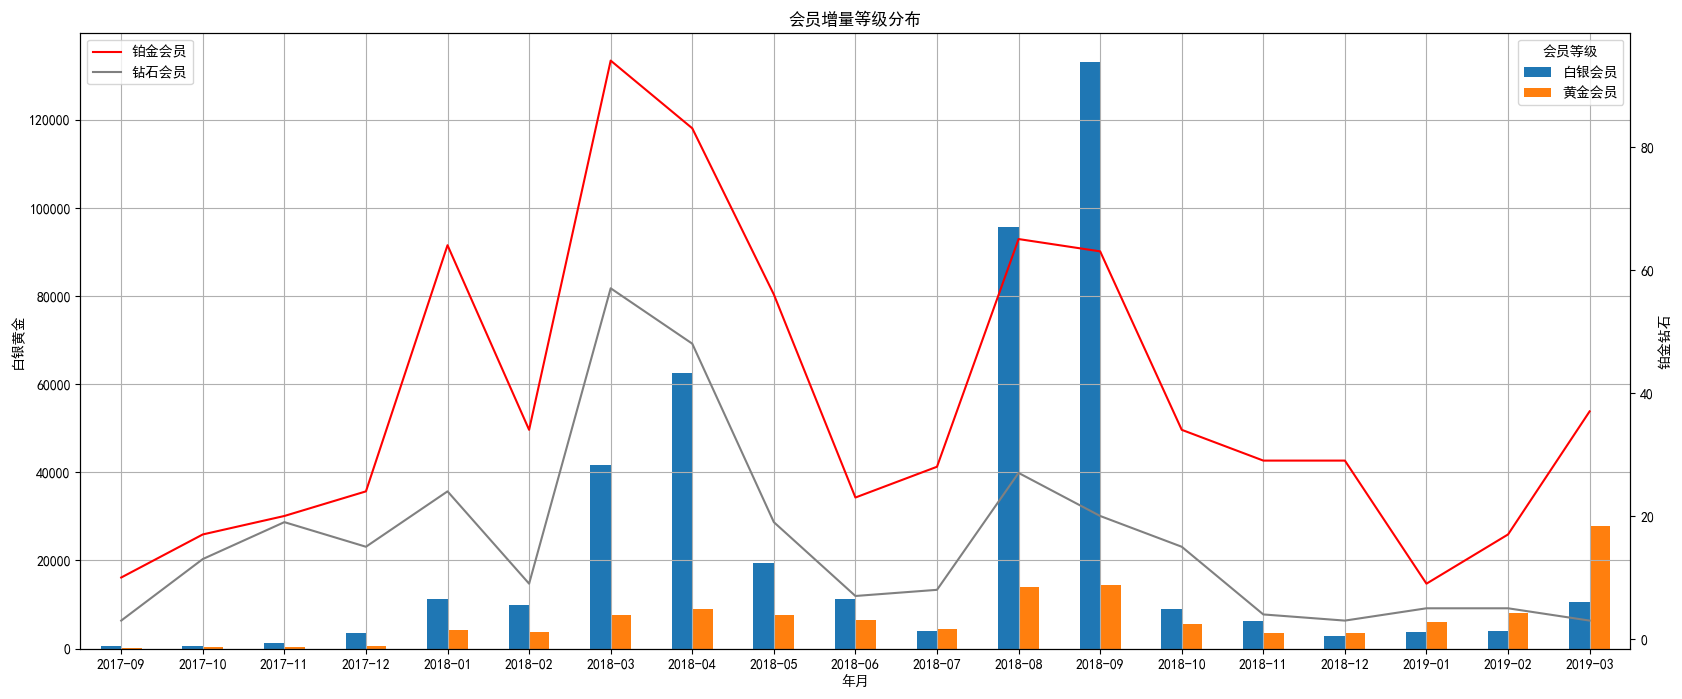

In [20]:
# pandas绘图
fig,ax1 = plt.subplots(figsize=(20,8),dpi=100)
ax2 = ax1.twinx()
month_degree_count[['白银会员','黄金会员']].plot.bar(ax=ax1,rot = 0,grid=True,xlabel='年月',ylabel='白银黄金')
month_degree_count[['铂金会员','钻石会员']].plot(ax=ax2,color=['red','gray'],ylabel='铂金钻石')
ax2.legend(loc='upper left')
plt.title('会员增量等级分布')

## 增量等级占比分析

- 增量等级占比分析，查看增量会员的消费情况

## 计算每月新增会员总量

In [21]:
month_degree_count = month_degree_count.copy()
month_degree_count.loc[:,'总计'] = month_degree_count.sum(axis=1)
month_degree_count

会员等级,白银会员,钻石会员,铂金会员,黄金会员,总计
注册年月,,,,,
2017-09,530,3,10,217,760
2017-10,603,13,17,363,996
2017-11,1311,19,20,360,1710
2017-12,3512,15,24,614,4165
2018-01,11244,24,64,4199,15531
2018-02,9937,9,34,3818,13798
2018-03,41546,57,94,7623,49320
2018-04,62613,48,83,8955,71699
2018-05,19317,19,56,7617,27009


### 计算白银和黄金会员等级占比，铂金钻石会员数量太少暂不计算

In [22]:
month_degree_count.loc[:,'白银会员占比'] = month_degree_count['白银会员']/month_degree_count['总计']
month_degree_count.loc[:,'黄金会员占比'] = month_degree_count['黄金会员']/month_degree_count['总计']
month_degree_count

会员等级,白银会员,钻石会员,铂金会员,黄金会员,总计,白银会员占比,黄金会员占比
注册年月,,,,,,,
2017-09,530,3,10,217,760,0.697368,0.285526
2017-10,603,13,17,363,996,0.605422,0.364458
2017-11,1311,19,20,360,1710,0.766667,0.210526
2017-12,3512,15,24,614,4165,0.843217,0.147419
2018-01,11244,24,64,4199,15531,0.723971,0.270363
2018-02,9937,9,34,3818,13798,0.720177,0.276707
2018-03,41546,57,94,7623,49320,0.842376,0.154562
2018-04,62613,48,83,8955,71699,0.873276,0.124897
2018-05,19317,19,56,7617,27009,0.715206,0.282017


### 对上面的统计结果进行可视化

<AxesSubplot: xlabel='注册年月', ylabel='占比'>

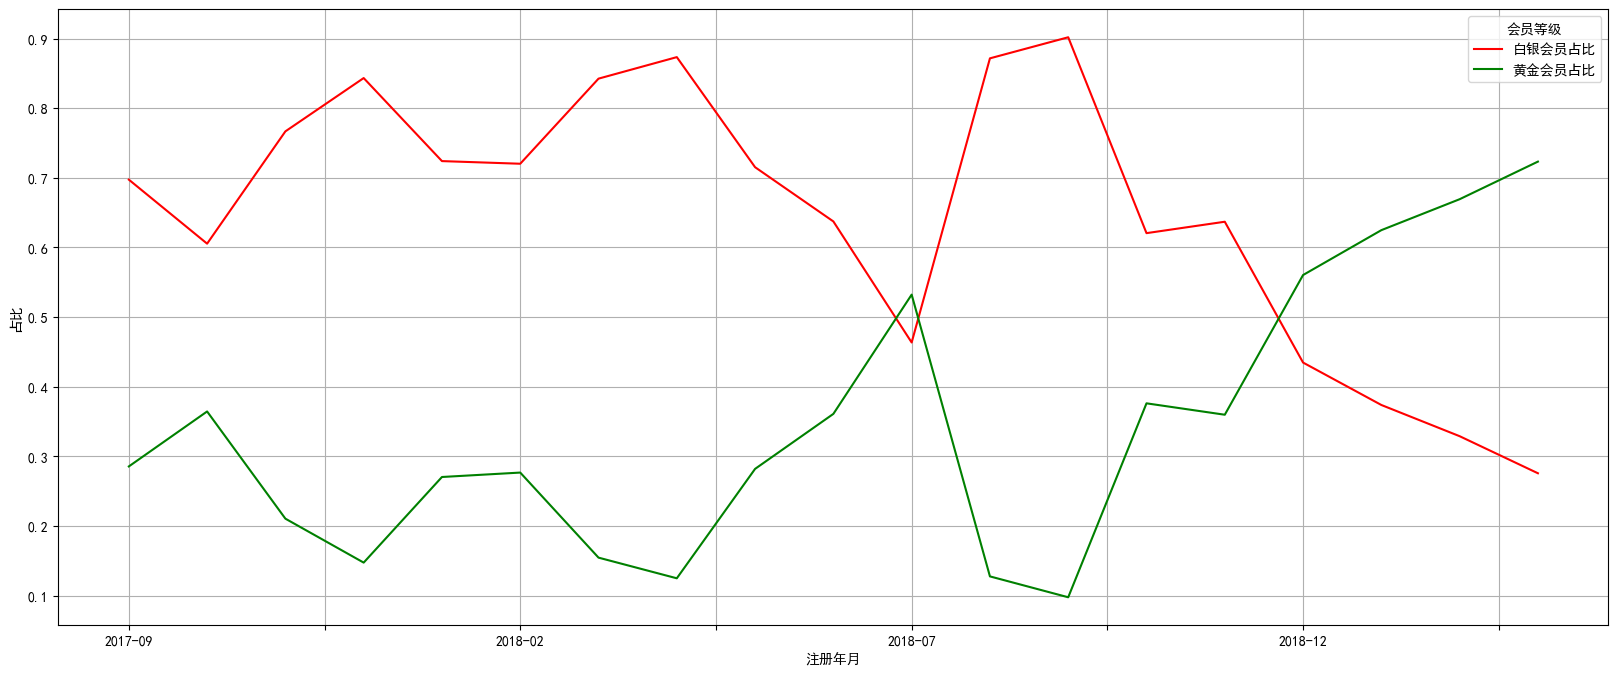

In [23]:
month_degree_count[['白银会员占比','黄金会员占比']].plot(figsize=(20,8),color=['r','g'],ylabel='占比',grid=True)

## 会员整体等级分布

- 计算各个等级会员占整体的百分比

- 思路：按照会员等级分组，计算每组的会员数量，用每组会员数量/全部会员数量

### 按照会员等级分组，计算每组的会员数量

In [24]:
ratio = member_df.groupby('会员等级')[['会员卡号']].count()
ratio

,会员卡号
会员等级,
白银会员,807615
钻石会员,489
铂金会员,1123
黄金会员,143487


### 透视表实现

In [25]:
ratio = member_df.pivot_table(index='会员等级',values='会员卡号',aggfunc='count')
ratio

,会员卡号
会员等级,
白银会员,807615
钻石会员,489
铂金会员,1123
黄金会员,143487


In [26]:
ratio.columns = ['会员数']
ratio

,会员数
会员等级,
白银会员,807615
钻石会员,489
铂金会员,1123
黄金会员,143487


### 计算各个等级会员占比

In [27]:
ratio.loc[:,'占比'] = ratio['会员数']/ratio['会员数'].sum()
ratio

,会员数,占比
会员等级,,
白银会员,807615,0.847699
钻石会员,489,0.000513
铂金会员,1123,0.001179
黄金会员,143487,0.150609


### 对上面的统计结果进行可视化

<AxesSubplot: ylabel='占比'>

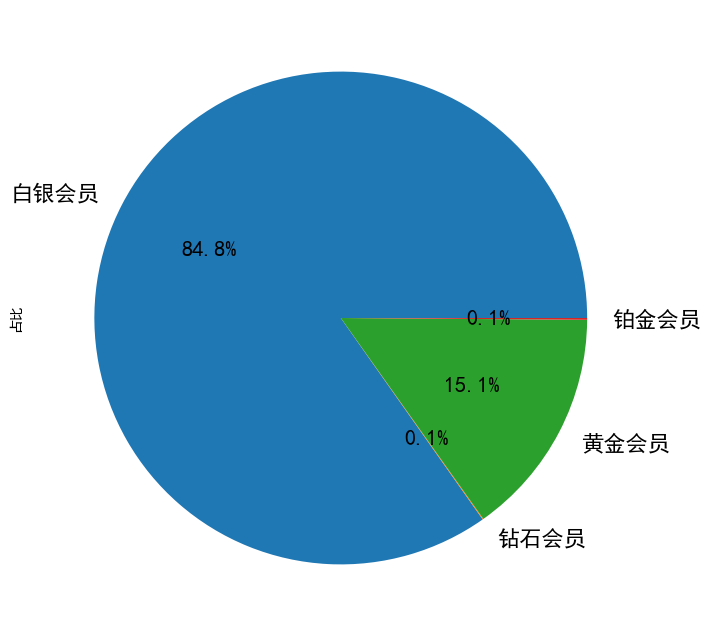

In [28]:
ratio.loc[['白银会员','钻石会员','黄金会员','铂金会员'],'占比'].plot.pie(figsize=(20,8),autopct='%.1f%%',fontsize=16)

## 线上线下增量分析

- 从业务角度，将会员数据拆分成线上和线下，比较每月线上线下会员的运营情况

### 按照注册年月和会员来源统计会员增量

In [29]:
# 分组聚合实现
from_data = member_df.groupby(['注册年月','会员来源'])[['会员卡号']].count()
from_data

会员卡号
注册年月    会员来源        
2017-08 电商入口     128
        线下扫码  392782
2017-09 电商入口       1
        线下扫码     759
2017-10 电商入口       1
        线下扫码     995
2017-11 电商入口       4
        线下扫码    1706
2017-12 电商入口     510
        线下扫码    3655
2018-01 电商入口   11739
        线下扫码    3792
2018-02 电商入口   10665
        线下扫码    3133
2018-03 电商入口    6652
        线下扫码   42668
2018-04 电商入口    3396
        线下扫码   68303
2018-05 电商入口    3560
        线下扫码   23449
2018-06 电商入口    3368
        线下扫码   14350
2018-07 电商入口    1290
        线下扫码    7193
2018-08 电商入口    9166
        线下扫码  100508
2018-09 电商入口   10943
        线下扫码  136642
2018-10 电商入口    3281
        线下扫码   11373
2018-11 电商入口    2350
        线下扫码    7562
2018-12 电商入口    1108
        线下扫码    5352
2019-01 电商入口     946
        线下扫码    8849
2019-02 电商入口     844
        线下扫码   11319
2019-03 电商入口    1383
        线下扫码   36989

In [30]:
# unstack操作
from_data = from_data.unstack()
from_data

会员卡号        
会员来源      电商入口    线下扫码
注册年月                  
2017-08    128  392782
2017-09      1     759
2017-10      1     995
2017-11      4    1706
2017-12    510    3655
2018-01  11739    3792
2018-02  10665    3133
2018-03   6652   42668
2018-04   3396   68303
2018-05   3560   23449
2018-06   3368   14350
2018-07   1290    7193
2018-08   9166  100508
2018-09  10943  136642
2018-10   3281   11373
2018-11   2350    7562
2018-12   1108    5352
2019-01    946    8849
2019-02    844   11319
2019-03   1383   36989

In [31]:
from_data = member_df.pivot_table(index='注册年月',
                                  columns=['会员来源'],
                                  values='会员卡号',
                                  aggfunc='count')
from_data

会员来源,电商入口,线下扫码
注册年月,,
2017-08,128,392782
2017-09,1,759
2017-10,1,995
2017-11,4,1706
2017-12,510,3655
2018-01,11739,3792
2018-02,10665,3133
2018-03,6652,42668
2018-04,3396,68303


### 从结果中剔除 2017-08 月份的数据

In [32]:
from_data = from_data[1:]
from_data

会员来源,电商入口,线下扫码
注册年月,,
2017-09,1,759
2017-10,1,995
2017-11,4,1706
2017-12,510,3655
2018-01,11739,3792
2018-02,10665,3133
2018-03,6652,42668
2018-04,3396,68303
2018-05,3560,23449


### 对上面的统计结果进行可视化

Text(0.5, 1.0, '电商与线下会员增量分析')

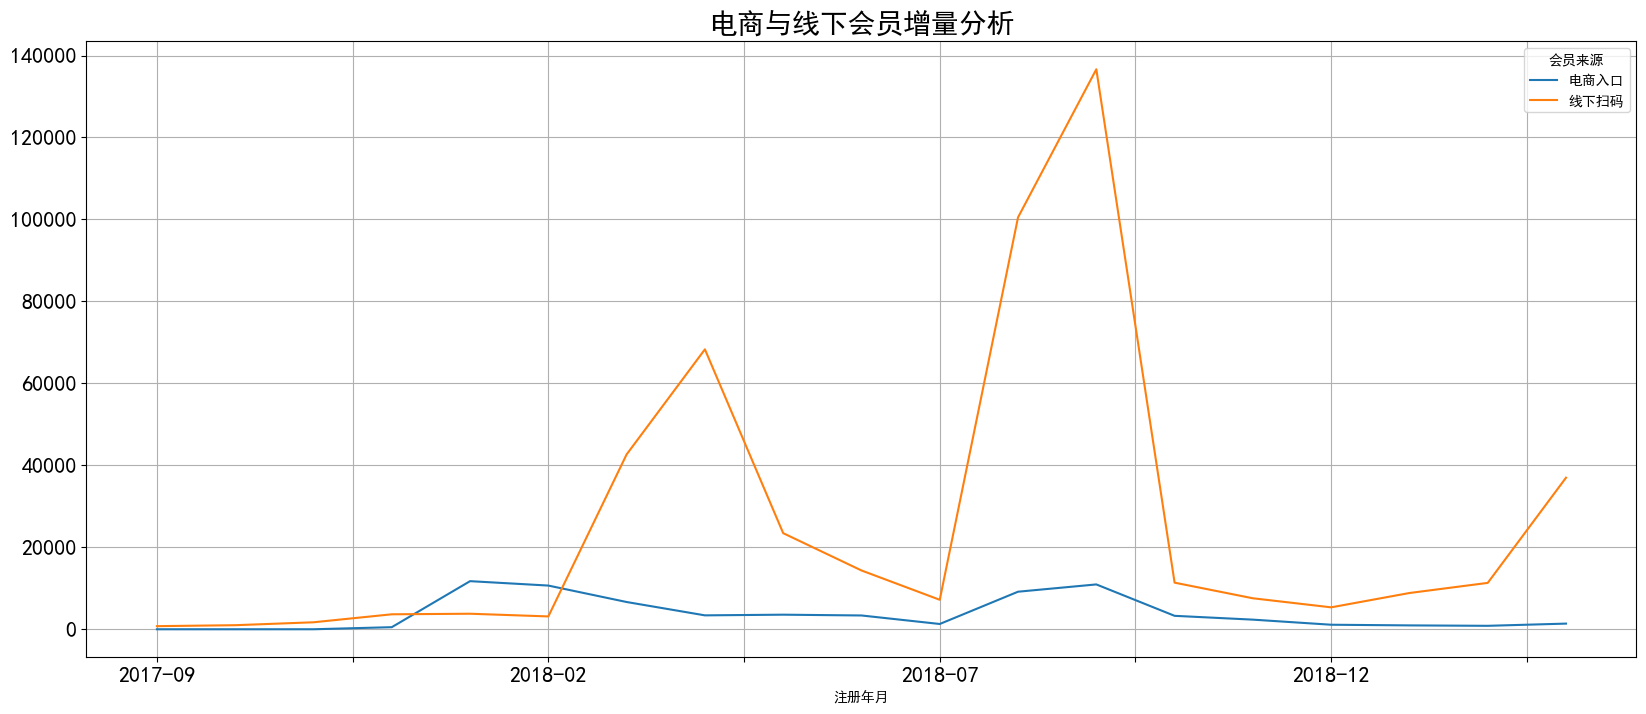

In [33]:
from_data.plot(figsize=(20,8),fontsize=16,grid=True)
plt.title('电商与线下会员增量分析',fontsize=20)

## 地区店均会员数量

- 思路：会员信息查询表中，只有店铺信息，没有地区信息，需要从门店信息表中关联地区信息

### 加载 门店信息表.XLSX 数据，并从中提取出 店铺代码 和 地区编码

In [34]:
store_info = pd.read_excel('./data/门店信息表.XLSX')
store_info

,店铺代码,地区编码,渠道大类,商圈等级描述,商圈类别描述,店铺位置,店铺状态,仓储类别,营业员数,仓储面积,店铺等级,店铺时尚度,接受价格等级,店铺类型,装修代数
0,DPX00X,GBL6020,DZ01,流行,中心,1F中岛,A,店外仓,2.0,15,A,2.0,中,1.0,8代
1,DPX002,GBL6020,DZ01,流行,中心,1F中岛,A,店外仓,2.0,17,A,1.0,中,1.0,7代
2,DPX003,GBL6020,DZ01,流行,中心,2F中岛,A,店外仓,2.0,10,B,2.0,中,1.0,7代
3,DPX004,GBL6020,DZ01,流行,新兴,1F边厅,A,店外仓,2.0,13,B,2.0,中,1.0,7代
4,DPX005,GBL6020,DZ01,流行,中心,1F边厅,A,店外仓,3.0,9,B,1.0,中,1.0,7代
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786,DPJ034,GBL6010,DZ01,流行,新兴,2F边厅,A,店内仓,4.0,20,B,2.0,中,2.0,8代
787,DPJ036,GBL6120,DZ01,流行,中心,1F边厅,A,店外仓,3.0,30,B,2.0,中,2.0,8代
788,DPJ037,GBL6100,DZ01,大众,中心,二楼边厅,A,店内仓,3.0,20,A,2.0,中,2.0,8代
789,DPJ038,GBL6060,DZ01,折扣,郊区,2F边厅,A,店内仓,6.0,50,A,2.0,中,2.0,NaN


In [35]:
store_info[['店铺代码','地区编码']]

,店铺代码,地区编码
0,DPX00X,GBL6020
1,DPX002,GBL6020
2,DPX003,GBL6020
3,DPX004,GBL6020
4,DPX005,GBL6020
...,...,...
786,DPJ034,GBL6010
787,DPJ036,GBL6120
788,DPJ037,GBL6100
789,DPJ038,GBL6060


### 将会员信息数据和门店数据进行 merge 操作

In [36]:
country_info = pd.merge(member_df,store_info[['店铺代码','地区编码']],left_on='所属店铺编码',right_on='店铺代码')
country_info.head()

,会员卡号,会员等级,会员来源,注册时间,所属店铺编码,门店店员编码,省份,城市,性别,生日,年齡,生命级别,注册年月,店铺代码,地区编码
0,BL6099033963550303769,黄金会员,线下扫码,2019-03-31 23:55:03.977,DPXX07,NaN,NaN,NaN,女,1975-04-04,43.0,活跃,2019-03,DPXX07,GBL6030
1,BL6099033963450303763,黄金会员,线下扫码,2019-03-31 23:45:03.005,DPXX07,NaN,NaN,NaN,女,1982-04-02,36.0,活跃,2019-03,DPXX07,GBL6030
2,BL6099033963460503766,黄金会员,线下扫码,2019-03-31 23:42:05.516,DPXX07,NaN,NaN,NaN,女,1993-11-24,25.0,活跃,2019-03,DPXX07,GBL6030
3,BL6099033963636603763,黄金会员,线下扫码,2019-03-31 23:23:26.115,DPXX07,NaN,NaN,NaN,女,1976-02-26,43.0,活跃,2019-03,DPXX07,GBL6030
4,BL6099033963039603755,黄金会员,线下扫码,2019-03-31 23:08:16.873,DPXX07,NaN,NaN,NaN,女,2000-02-07,19.0,活跃,2019-03,DPXX07,GBL6030


### 统计不同地区的会员数量

- 注意只统计线下，不统计电商渠道， GBL6D01 地区为电商

In [37]:
district = country_info[country_info['地区编码']!='GBL6D01'].groupby('地区编码')[['会员卡号']].count()
district

,会员卡号
地区编码,
GBL6010,51745
GBL6020,46945
GBL6030,112114
GBL6040,63426
GBL6050,50474
GBL6060,74447
GBL6070,147804
GBL6080,66750
GBL6090,66685


In [38]:
district.columns = ['会员数量']
district

,会员数量
地区编码,
GBL6010,51745
GBL6020,46945
GBL6030,112114
GBL6040,63426
GBL6050,50474
GBL6060,74447
GBL6070,147804
GBL6080,66750
GBL6090,66685


In [39]:
district['店铺数'] = country_info[['地区编码','所属店铺编码']].drop_duplicates().groupby('地区编码')['所属店铺编码'].count()
district

,会员数量,店铺数
地区编码,,
GBL6010,51745,40
GBL6020,46945,41
GBL6030,112114,78
GBL6040,63426,47
GBL6050,50474,38
GBL6060,74447,31
GBL6070,147804,114
GBL6080,66750,70
GBL6090,66685,66


### 计算店均会员数和总平均会员数

In [40]:
district.loc[:,'每店平均会员数'] = round(district['会员数量']/district['店铺数'])
district.loc[:,'总平均会员数'] = district['会员数量'].sum()/district['店铺数'].sum()
district

,会员数量,店铺数,每店平均会员数,总平均会员数
地区编码,,,,
GBL6010,51745,40,1294.0,1173.60719
GBL6020,46945,41,1145.0,1173.60719
GBL6030,112114,78,1437.0,1173.60719
GBL6040,63426,47,1349.0,1173.60719
GBL6050,50474,38,1328.0,1173.60719
GBL6060,74447,31,2402.0,1173.60719
GBL6070,147804,114,1297.0,1173.60719
GBL6080,66750,70,954.0,1173.60719
GBL6090,66685,66,1010.0,1173.60719


### 按照店均会员数对数据进行排序

In [41]:
district = district.sort_values('每店平均会员数',ascending=False)
district

,会员数量,店铺数,每店平均会员数,总平均会员数
地区编码,,,,
GBL6060,74447,31,2402.0,1173.60719
GBL6030,112114,78,1437.0,1173.60719
GBL6040,63426,47,1349.0,1173.60719
GBL6050,50474,38,1328.0,1173.60719
GBL6070,147804,114,1297.0,1173.60719
GBL6010,51745,40,1294.0,1173.60719
GBL6100,43695,38,1150.0,1173.60719
GBL6020,46945,41,1145.0,1173.60719
GBL6110,48547,46,1055.0,1173.60719


### 对上面的统计结果进行可视化

Text(0.5, 1.0, '地区店均会员分析')

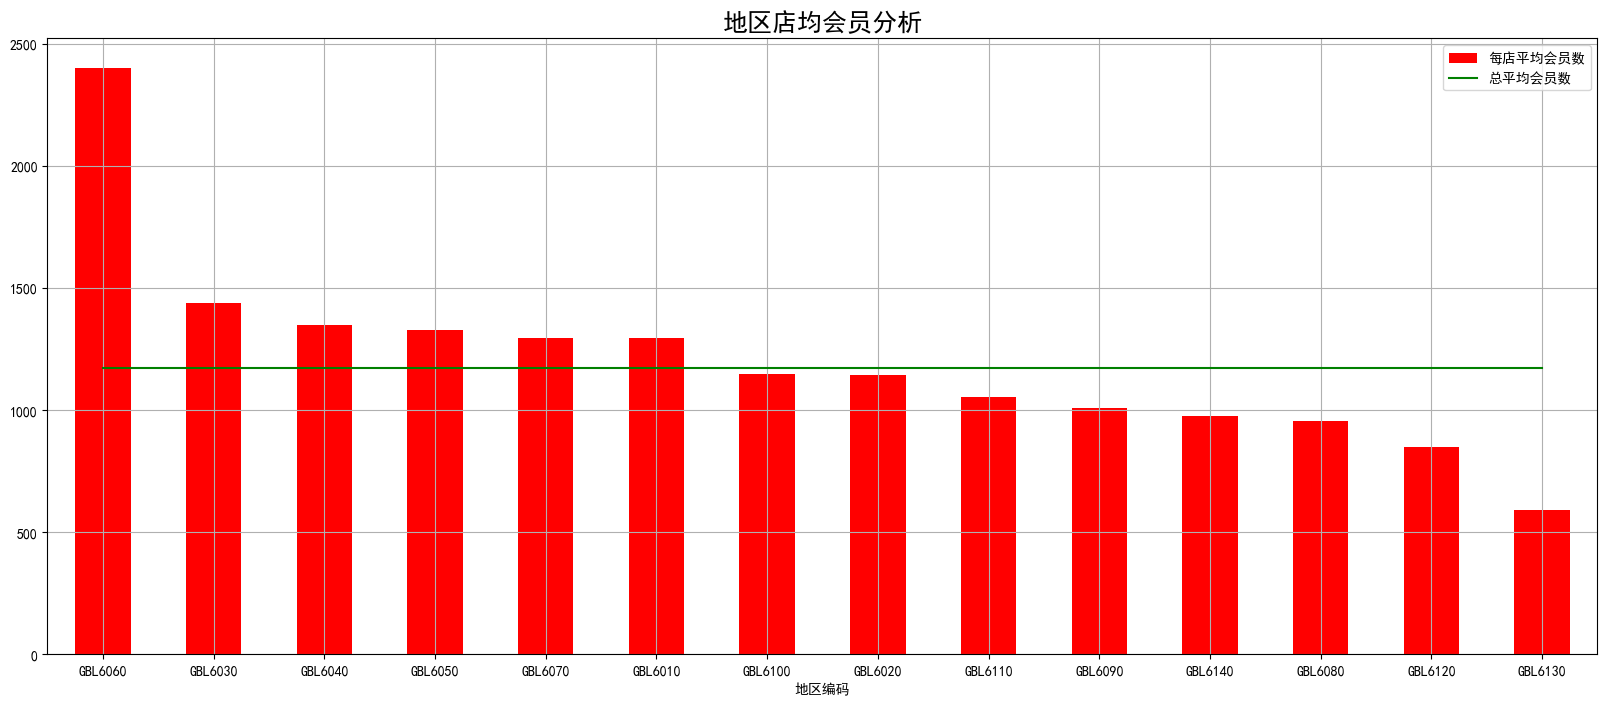

In [42]:
district['每店平均会员数'].plot.bar(figsize=(20,8),color='r',legend=True,grid=True)
district['总平均会员数'].plot(figsize=(20,8),color='g',legend=True,grid=True)
plt.title('地区店均会员分析',fontsize=18)

## 各地区会销比

- 会销比的计算和分析会销比的作用:
- 会销比 = 会员消费的金额 / 全部客户消费的金额
- 由于数据脱敏的原因，没有全部客户消费金额的数据，所以用如下方式替换
- 会销比 = 会员消费的订单数 / 全部销售订单数
- 会销比统计的是会员消费占所有销售金额的比例
- 通过会销比可以衡量会员的整体质量

### 加载 全国销售订单数量表.xlsx 数据

In [43]:
all_orders = pd.read_excel('./data/全国销售订单数量表.xlsx')
all_orders

,年月,地区代码,店铺代码,全部订单数,会员订单数
0,201801,GBL6030,DPX077,130,7.0
1,201801,GBL6030,DPX078,277,19.0
2,201801,GBL6030,DPX079,163,1.0
3,201801,GBL6030,DPX08X,154,5.0
4,201801,GBL6030,DPX082,276,14.0
...,...,...,...,...,...
8495,201901,GBL6060,DPX865,80,2.0
8496,201901,GBL6060,DPX880,105,NaN
8497,201901,GBL6060,DPX88X,76,NaN
8498,201901,GBL6060,DPX893,99,NaN


### 按照地区和年月统计会员订单数

In [44]:
member_orders = all_orders.pivot_table(values='会员订单数',index='地区代码',columns='年月',aggfunc='sum',margins='all')
member_orders

年月,201801,201802,201803,201804,201805,201806,201807,201808,201809,201810,201811,201812,201901,All
地区代码,,,,,,,,,,,,,,
GBL6010,139.0,74.0,143.0,114.0,59.0,33.0,38.0,60.0,51.0,48.0,43.0,38.0,218.0,1058.0
GBL6020,16.0,31.0,16.0,11.0,483.0,552.0,75.0,915.0,540.0,78.0,8.0,42.0,198.0,2965.0
GBL6030,1881.0,1303.0,1878.0,1983.0,3012.0,2904.0,2477.0,3731.0,4290.0,2752.0,2043.0,2390.0,3072.0,33716.0
GBL6040,474.0,608.0,646.0,789.0,926.0,605.0,628.0,1189.0,1131.0,497.0,411.0,403.0,553.0,8860.0
GBL6050,799.0,850.0,1093.0,1737.0,2308.0,1714.0,1229.0,1265.0,1140.0,842.0,756.0,758.0,1042.0,15533.0
GBL6060,449.0,594.0,541.0,516.0,661.0,544.0,511.0,633.0,562.0,242.0,154.0,110.0,113.0,5630.0
GBL6070,927.0,719.0,946.0,1078.0,1101.0,948.0,916.0,1700.0,2318.0,1069.0,886.0,911.0,1016.0,14535.0
GBL6080,10.0,7.0,15.0,8.0,75.0,51.0,50.0,976.0,852.0,100.0,46.0,43.0,570.0,2803.0
GBL6090,309.0,311.0,450.0,548.0,490.0,363.0,256.0,915.0,1126.0,682.0,561.0,368.0,354.0,6733.0


### 按照地区和年月统计全部订单数

In [45]:
country_sales = all_orders.pivot_table(values='全部订单数',index='地区代码',columns='年月',aggfunc='sum',margins='all')
country_sales

年月,201801,201802,201803,201804,201805,201806,201807,201808,201809,201810,201811,201812,201901,All
地区代码,,,,,,,,,,,,,,
GBL6010,6313,7576,7736,10455,12881,9287,8162,8151,6190,5500,5894,5313,6643,100101
GBL6020,8038,10076,9776,11758,14248,10947,11335,9291,8847,6927,5618,6407,8257,121525
GBL6030,16380,16995,23606,22201,22584,17215,15608,14297,17721,15831,15377,13350,14858,226023
GBL6040,9284,12724,10448,12882,12682,10219,11490,11598,10083,9082,6787,7214,10404,134897
GBL6050,3334,4849,4443,5911,6589,5264,4483,4278,4666,3743,3926,3372,5067,59925
GBL6060,2848,3847,5225,6018,6509,4810,4594,4148,4511,3906,3295,2766,3209,55686
GBL6070,14375,17605,22083,24989,26511,21979,18659,17956,22618,19918,14078,13658,16146,250575
GBL6080,6880,6733,8870,11386,13312,11234,8989,8552,10817,10301,11182,10015,10407,128678
GBL6090,5095,6562,10346,8907,9933,8107,7304,8297,9748,9287,7405,6033,6426,103450


### 计算会销比

In [46]:
result = member_orders / country_sales
result.applymap(lambda x:format(x,'.2%'))

年月,201801,201802,201803,201804,201805,201806,201807,201808,201809,201810,201811,201812,201901,All
地区代码,,,,,,,,,,,,,,
GBL6010,2.20%,0.98%,1.85%,1.09%,0.46%,0.36%,0.47%,0.74%,0.82%,0.87%,0.73%,0.72%,3.28%,1.06%
GBL6020,0.20%,0.31%,0.16%,0.09%,3.39%,5.04%,0.66%,9.85%,6.10%,1.13%,0.14%,0.66%,2.40%,2.44%
GBL6030,11.48%,7.67%,7.96%,8.93%,13.34%,16.87%,15.87%,26.10%,24.21%,17.38%,13.29%,17.90%,20.68%,14.92%
GBL6040,5.11%,4.78%,6.18%,6.12%,7.30%,5.92%,5.47%,10.25%,11.22%,5.47%,6.06%,5.59%,5.32%,6.57%
GBL6050,23.97%,17.53%,24.60%,29.39%,35.03%,32.56%,27.41%,29.57%,24.43%,22.50%,19.26%,22.48%,20.56%,25.92%
GBL6060,15.77%,15.44%,10.35%,8.57%,10.16%,11.31%,11.12%,15.26%,12.46%,6.20%,4.67%,3.98%,3.52%,10.11%
GBL6070,6.45%,4.08%,4.28%,4.31%,4.15%,4.31%,4.91%,9.47%,10.25%,5.37%,6.29%,6.67%,6.29%,5.80%
GBL6080,0.15%,0.10%,0.17%,0.07%,0.56%,0.45%,0.56%,11.41%,7.88%,0.97%,0.41%,0.43%,5.48%,2.18%
GBL6090,6.06%,4.74%,4.35%,6.15%,4.93%,4.48%,3.50%,11.03%,11.55%,7.34%,7.58%,6.10%,5.51%,6.51%


## 各地区会员连带率分析

- 连带率的概念和为什么分析连带率:

- 1）连带率是指销售的件数和交易的次数相除后的数值，反映的是顾客平均单次消费的产品件数

- 2）为什么分析连带率？

- 连带率直接影响到客单价
- 连带率反应运营质量
- 3）分析连带率的作用

- 通过连带率分析可以反映出人、货、场几个角度的业务问题
- 连带率的计算

- 连带率 = 消费数量 / 订单数量
- 用到的数据：

- 会员消费报表.xlsx：会员消费记录
- 门店信息表.xlsx：建立门店地区对应关系

### 加载 会员消费报表 数据

In [47]:
member_consume = pd.read_excel('./data/会员消费报表.xlsx')
member_consume

,卡号,订单日期,订单号,订单类型,店铺代码,款号,尺码,消费数量,消费金额,当前积分
0,HS340766JAF6,2018-11-30,ODLOX6BXX8X2BXBBBBX,下单,DPX60X,BLA267Q3X13AQM,230,1,1200.0,800
1,BL6093039999465603590,2018-11-30,ODODOXF77X8X2BXBBBB2,下单,DPX377,BLA2651QX14AQC,240,1,1332.0,2531
2,BL6093909593939600407,2018-11-30,ROX8XXFBBBB6BB,退单,DPS00X,TMA27727X5QAQM,240,-1,-112.5,328
3,BL6093036096030709394,2018-11-30,ROX8XXFBBBB6X7,退单,DPS00X,TMA67621X5QBQTM,230,-1,-60.0,1038
4,BL6093993066943700650,2018-11-30,ODLOX6BFX8XXFBBBBBX,下单,DPX603,BLA26663X52AQTM,235,1,1200.0,800
...,...,...,...,...,...,...,...,...,...,...
203432,BL6093969594069900955,2019-01-01,ODROX68BX9BXBXBBBBX,退单,DPX680,BL44P7QXQ1XXA,230,-1,-1.5,0
203433,BL6093969594069900955,2019-01-01,ODROX68BX9BXBXBBBBX,退单,DPX680,BLA26766X5QC3TM,235,-1,-1707.0,0
203434,BL6099090990995900030,2019-01-01,ODLOX68BX9BXBXBBBBF,下单,DPX680,BLA26663X56BQTM,235,1,1011.0,337
203435,BL6099090909590300063,2019-01-01,ODLOX22XX9BXBXBBBBF,下单,DPX22X,BLA27522X16AQTM,235,1,1032.0,344


### 排除其中的 退单 数据

In [48]:
member_consume = member_consume.query('订单类型 == "下单"')
member_consume

,卡号,订单日期,订单号,订单类型,店铺代码,款号,尺码,消费数量,消费金额,当前积分
0,HS340766JAF6,2018-11-30,ODLOX6BXX8X2BXBBBBX,下单,DPX60X,BLA267Q3X13AQM,230,1,1200.0,800
1,BL6093039999465603590,2018-11-30,ODODOXF77X8X2BXBBBB2,下单,DPX377,BLA2651QX14AQC,240,1,1332.0,2531
4,BL6093993066943700650,2018-11-30,ODLOX6BFX8XXFBBBBBX,下单,DPX603,BLA26663X52AQTM,235,1,1200.0,800
5,BL6093993066063900639,2018-11-30,ODLOX78MX8XXFBBBBB6,下单,DPX784,BLA26515X1QBQQ,230,1,598.5,899
6,BL6093993066063900639,2018-11-30,ODLOX78MX8XXFBBBBB6,下单,DPX784,BLA26524X13AQS,225,1,898.5,899
...,...,...,...,...,...,...,...,...,...,...
203430,BL6099090990476000043,2019-01-01,ODLOX22FX9BXBXBBBBX,下单,DPX223,BLQ12XQ1QQ61QQGA,230,1,15.0,405
203431,BL6099090990476000043,2019-01-01,ODLOX22FX9BXBXBBBBX,下单,DPX223,BLA675Q2X5QBQM,240,1,1185.0,405
203434,BL6099090990995900030,2019-01-01,ODLOX68BX9BXBXBBBBF,下单,DPX680,BLA26663X56BQTM,235,1,1011.0,337
203435,BL6099090909590300063,2019-01-01,ODLOX22XX9BXBXBBBBF,下单,DPX22X,BLA27522X16AQTM,235,1,1032.0,344


### 给 member_consume 数据增加 年月 列

In [49]:
import numpy as np
member_consume['年月'] = pd.to_datetime(member_consume['订单日期']).apply(
    lambda x:datetime.strftime(x,'%Y%m')).astype(np.int32)
member_consume

C:\Users\hp\AppData\Local\Temp\ipykernel_14224\2418056918.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  member_consume['年月'] = pd.to_datetime(member_consume['订单日期']).apply(


,卡号,订单日期,订单号,订单类型,店铺代码,款号,尺码,消费数量,消费金额,当前积分,年月
0,HS340766JAF6,2018-11-30,ODLOX6BXX8X2BXBBBBX,下单,DPX60X,BLA267Q3X13AQM,230,1,1200.0,800,201811
1,BL6093039999465603590,2018-11-30,ODODOXF77X8X2BXBBBB2,下单,DPX377,BLA2651QX14AQC,240,1,1332.0,2531,201811
4,BL6093993066943700650,2018-11-30,ODLOX6BFX8XXFBBBBBX,下单,DPX603,BLA26663X52AQTM,235,1,1200.0,800,201811
5,BL6093993066063900639,2018-11-30,ODLOX78MX8XXFBBBBB6,下单,DPX784,BLA26515X1QBQQ,230,1,598.5,899,201811
6,BL6093993066063900639,2018-11-30,ODLOX78MX8XXFBBBBB6,下单,DPX784,BLA26524X13AQS,225,1,898.5,899,201811
...,...,...,...,...,...,...,...,...,...,...,...
203430,BL6099090990476000043,2019-01-01,ODLOX22FX9BXBXBBBBX,下单,DPX223,BLQ12XQ1QQ61QQGA,230,1,15.0,405,201901
203431,BL6099090990476000043,2019-01-01,ODLOX22FX9BXBXBBBBX,下单,DPX223,BLA675Q2X5QBQM,240,1,1185.0,405,201901
203434,BL6099090990995900030,2019-01-01,ODLOX68BX9BXBXBBBBF,下单,DPX680,BLA26663X56BQTM,235,1,1011.0,337,201901
203435,BL6099090909590300063,2019-01-01,ODLOX22XX9BXBXBBBBF,下单,DPX22X,BLA27522X16AQTM,235,1,1032.0,344,201901


### 将 member_consume(会员消费数据) 和 store_info(地区门店数据) 进行 merge 操作

In [50]:
ret = member_consume[['年月','订单号','店铺代码','消费数量']].merge(store_info[['店铺代码','地区编码']],on='店铺代码')
ret

,年月,订单号,店铺代码,消费数量,地区编码
0,201811,ODLOX6BXX8X2BXBBBBX,DPX60X,1,GBL6140
1,201811,ODLOX6BXX8XX28BBBBX,DPX60X,1,GBL6140
2,201811,ODLOX6BXX8XX28BBBB2,DPX60X,1,GBL6140
3,201811,ODLDX6BXX8XX28BBBBX,DPX60X,1,GBL6140
4,201811,ODLOX6BXX8XX27BBBBX,DPX60X,1,GBL6140
...,...,...,...,...,...
187844,201901,ODLOX9B2X9BXX2BBBBX,DPX902,1,GBL6070
187845,201901,ODLOX892X9BXB9BBBBX,DPX892,1,GBL6130
187846,201901,ODODOX2B2X9BXB8BBBBX,DPX202,1,GBL6090
187847,201901,ODLOX9BFX9BXBXBBBBX,DPX903,1,GBL6140


### 剔除电商渠道的数据，电商渠道地区编码为：GBL6D01

In [51]:
ret = ret.query('地区编码!="GBL6D01"')
ret

,年月,订单号,店铺代码,消费数量,地区编码
0,201811,ODLOX6BXX8X2BXBBBBX,DPX60X,1,GBL6140
1,201811,ODLOX6BXX8XX28BBBBX,DPX60X,1,GBL6140
2,201811,ODLOX6BXX8XX28BBBB2,DPX60X,1,GBL6140
3,201811,ODLDX6BXX8XX28BBBBX,DPX60X,1,GBL6140
4,201811,ODLOX6BXX8XX27BBBBX,DPX60X,1,GBL6140
...,...,...,...,...,...
187844,201901,ODLOX9B2X9BXX2BBBBX,DPX902,1,GBL6070
187845,201901,ODLOX892X9BXB9BBBBX,DPX892,1,GBL6130
187846,201901,ODODOX2B2X9BXB8BBBBX,DPX202,1,GBL6090
187847,201901,ODLOX9BFX9BXBXBBBBX,DPX903,1,GBL6140


### 按照地区和年月统计会员消费数量

In [52]:
consume_count = ret.pivot_table(values='消费数量',index='地区编码',columns='年月',aggfunc='sum')
consume_count

年月,201801,201802,201803,201804,201805,201806,201807,201808,201809,201810,201811,201812,201901
地区编码,,,,,,,,,,,,,
GBL6010,133,81,155,122,79,37,45,85,61,61,52,44,261
GBL6020,15,31,15,5,517,623,102,1012,613,92,9,56,292
GBL6030,2071,1547,2692,3374,4269,4219,3482,4621,5452,3668,2520,2834,3791
GBL6040,470,647,726,806,1008,657,718,1345,1298,572,463,431,658
GBL6050,543,637,1082,1846,2589,1906,1570,1524,1303,991,817,834,1209
GBL6060,441,460,613,545,771,660,672,779,728,279,169,128,165
GBL6070,1082,937,1158,1248,1321,1255,1137,2097,3036,1498,1137,1198,1491
GBL6080,12,9,17,4,94,58,25,1257,1151,133,52,52,679
GBL6090,337,355,546,645,630,446,340,1248,1607,834,682,458,457


### 按照地区和年月统计会员订单数

In [53]:
order_count = ret.pivot_table(values='订单号',index='地区编码',columns='年月',aggfunc='nunique')
order_count

年月,201801,201802,201803,201804,201805,201806,201807,201808,201809,201810,201811,201812,201901
地区编码,,,,,,,,,,,,,
GBL6010,128,75,141,109,60,33,37,56,51,48,44,38,215
GBL6020,15,31,15,5,479,560,74,919,540,79,8,40,192
GBL6030,1761,1246,2028,2178,2932,2808,2401,3404,4102,2610,1936,2278,2908
GBL6040,436,594,642,717,909,583,617,1172,1112,485,400,385,537
GBL6050,511,583,973,1622,2263,1655,1177,1237,1120,809,709,715,967
GBL6060,398,418,495,468,632,541,508,620,562,229,138,104,105
GBL6070,892,726,909,1029,1048,923,866,1654,2266,1015,852,894,981
GBL6080,11,9,14,4,70,40,17,960,845,95,40,38,562
GBL6090,301,305,435,522,487,353,244,928,1113,662,552,354,340


### 计算会员连带率

In [54]:
result = consume_count/order_count
result.applymap(lambda x:format(x,'.2f'))

年月,201801,201802,201803,201804,201805,201806,201807,201808,201809,201810,201811,201812,201901
地区编码,,,,,,,,,,,,,
GBL6010,1.04,1.08,1.10,1.12,1.32,1.12,1.22,1.52,1.20,1.27,1.18,1.16,1.21
GBL6020,1.00,1.00,1.00,1.00,1.08,1.11,1.38,1.10,1.14,1.16,1.12,1.40,1.52
GBL6030,1.18,1.24,1.33,1.55,1.46,1.50,1.45,1.36,1.33,1.41,1.30,1.24,1.30
GBL6040,1.08,1.09,1.13,1.12,1.11,1.13,1.16,1.15,1.17,1.18,1.16,1.12,1.23
GBL6050,1.06,1.09,1.11,1.14,1.14,1.15,1.33,1.23,1.16,1.22,1.15,1.17,1.25
GBL6060,1.11,1.10,1.24,1.16,1.22,1.22,1.32,1.26,1.30,1.22,1.22,1.23,1.57
GBL6070,1.21,1.29,1.27,1.21,1.26,1.36,1.31,1.27,1.34,1.48,1.33,1.34,1.52
GBL6080,1.09,1.00,1.21,1.00,1.34,1.45,1.47,1.31,1.36,1.40,1.30,1.37,1.21
GBL6090,1.12,1.16,1.26,1.24,1.29,1.26,1.39,1.34,1.44,1.26,1.24,1.29,1.34


## 会员复购率分析

- 复购率的概念和复购率分析的作用：

- 复购率：指会员对该品牌产品或者服务的重复购买次数，重复购买率越多，则反应出会员对品牌的忠诚度就越高，反之则越低。
- 计算复购率需要指定时间范围
- 如何计算复购：会员消费次数一天之内只计算一次
- 复购率 = 一段时间内消费次数大于1次的人数 / 总消费人数
- 复购率分析的作用：通过复购率分析可以反映出运营状态
- 复购率计算步骤：

- 统计会员消费次数与是否复购
- 计算复购率并定义函数
- 统计2018年01月~2018年12月复购率和2018年02月~2019年01月复购率
- 计算复购率环比

### 将 member_consume(会员消费数据) 和 store_info(地区门店数据) 进行 merge 操作

In [55]:
order_data = member_consume[['年月','订单日期','卡号','订单号','订单类型','店铺代码']].merge(
    store_info[['店铺代码','地区编码']],on = '店铺代码').query('订单类型!="退单"')
order_data

,年月,订单日期,卡号,订单号,订单类型,店铺代码,地区编码
0,201811,2018-11-30,HS340766JAF6,ODLOX6BXX8X2BXBBBBX,下单,DPX60X,GBL6140
1,201811,2018-11-28,BL6093996469665709064,ODLOX6BXX8XX28BBBBX,下单,DPX60X,GBL6140
2,201811,2018-11-27,BL6093996469665709064,ODLOX6BXX8XX28BBBB2,下单,DPX60X,GBL6140
3,201811,2018-11-27,BL6093996469665709064,ODLDX6BXX8XX28BBBBX,下单,DPX60X,GBL6140
4,201811,2018-11-27,BL6093996797695300339,ODLOX6BXX8XX27BBBBX,下单,DPX60X,GBL6140
...,...,...,...,...,...,...,...
187844,201901,2019-01-12,BL6093036060549503396,ODLOX9B2X9BXX2BBBBX,下单,DPX902,GBL6070
187845,201901,2019-01-09,BL6099090969949400565,ODLOX892X9BXB9BBBBX,下单,DPX892,GBL6130
187846,201901,2019-01-08,BL6093056769576003366,ODODOX2B2X9BXB8BBBBX,下单,DPX202,GBL6090
187847,201901,2019-01-01,BL6093960694035600946,ODLOX9BFX9BXBXBBBBX,下单,DPX903,GBL6140


### 统计会员是否复购

- 由于一个会员同一天消费多次也算一次消费，所以会员消费次数按一天一次计算 因此需要对"会员卡号"和"时间"进行去重昨天 15:06俊辉

In [56]:
order_data = order_data[['年月','订单日期','卡号','地区编码']].drop_duplicates()
order_data

,年月,订单日期,卡号,地区编码
0,201811,2018-11-30,HS340766JAF6,GBL6140
1,201811,2018-11-28,BL6093996469665709064,GBL6140
2,201811,2018-11-27,BL6093996469665709064,GBL6140
4,201811,2018-11-27,BL6093996797695300339,GBL6140
5,201811,2018-11-20,BL6097909463055600343,GBL6140
...,...,...,...,...
187842,201901,2019-01-12,BL6099099696474000099,GBL6020
187844,201901,2019-01-12,BL6093036060549503396,GBL6070
187845,201901,2019-01-09,BL6099090969949400565,GBL6130
187846,201901,2019-01-08,BL6093056769576003366,GBL6090


In [57]:
consume_count = order_data.pivot_table(values='年月',index=['地区编码','卡号'],aggfunc='count').reset_index()
consume_count

,地区编码,卡号,年月
0,GBL6010,BL6093030369930903555,1
1,GBL6010,BL6093030394336509657,1
2,GBL6010,BL6093030394665709666,1
3,GBL6010,BL6093030394669709994,1
4,GBL6010,BL6093030396343606006,1
...,...,...,...
109166,GBL6D01,SB069030JAF6,2
109167,GBL6D01,SB090405JA7A,1
109168,GBL6D01,SB096777JA93,4
109169,GBL6D01,SB099053JAB3,2


In [58]:
consume_count.rename(columns={'年月':'消费次数'},inplace=True)
consume_count

,地区编码,卡号,消费次数
0,GBL6010,BL6093030369930903555,1
1,GBL6010,BL6093030394336509657,1
2,GBL6010,BL6093030394665709666,1
3,GBL6010,BL6093030394669709994,1
4,GBL6010,BL6093030396343606006,1
...,...,...,...
109166,GBL6D01,SB069030JAF6,2
109167,GBL6D01,SB090405JA7A,1
109168,GBL6D01,SB096777JA93,4
109169,GBL6D01,SB099053JAB3,2


In [59]:
#判断是否复购
consume_count['是否复购'] = consume_count['消费次数'] > 1
consume_count

,地区编码,卡号,消费次数,是否复购
0,GBL6010,BL6093030369930903555,1,False
1,GBL6010,BL6093030394336509657,1,False
2,GBL6010,BL6093030394665709666,1,False
3,GBL6010,BL6093030394669709994,1,False
4,GBL6010,BL6093030396343606006,1,False
...,...,...,...,...
109166,GBL6D01,SB069030JAF6,2,True
109167,GBL6D01,SB090405JA7A,1,False
109168,GBL6D01,SB096777JA93,4,True
109169,GBL6D01,SB099053JAB3,2,True


### 按地区统计复购人数和消费人数

In [60]:
depart_data = consume_count.pivot_table(values=['消费次数','是否复购'],index='地区编码',aggfunc={'消费次数':'count','是否复购':'sum'})
depart_data.columns = ['复购人数','消费人数']
depart_data

,复购人数,消费人数
地区编码,,
GBL6010,64,791
GBL6020,126,2608
GBL6030,2606,26395
GBL6040,454,3918
GBL6050,1467,11129
GBL6060,440,4250
GBL6070,1498,7991
GBL6080,127,2335
GBL6090,582,3518


### 计算复购率

In [61]:
depart_data['复购率'] = depart_data['复购人数']/depart_data['消费人数']
depart_data

,复购人数,消费人数,复购率
地区编码,,,
GBL6010,64,791,0.080910
GBL6020,126,2608,0.048313
GBL6030,2606,26395,0.098731
GBL6040,454,3918,0.115875
GBL6050,1467,11129,0.131818
GBL6060,440,4250,0.103529
GBL6070,1498,7991,0.187461
GBL6080,127,2335,0.054390
GBL6090,582,3518,0.165435


### 定义计算指定时间范围复购率的函数

In [62]:
def stats_reorder(start,end,col):
    # 会员下单消费数据和地区门店数据进行merge
    order_data = member_consume[['年月','订单日期','卡号','订单号','订单类型','店铺代码']].merge(store_info[['店铺代码','地区编码']],on='店铺代码').query('订单类型!="退单"')
    # 筛选日期
    order_data = order_data[(order_data['年月']<=end) & (order_data['年月']>=start)]
    # 因为需要用到地区编号和年月，所以选择年月、订单日期、卡号、地区编码四个字段一起去重
    order_data = order_data[['年月','订单日期','卡号','地区编码']].drop_duplicates()
    # 按照地区编码和卡号进行分组 统计订单日期数量 每个地区每个会员的购买次数
    consume_count = order_data.pivot_table(index = ['地区编码','卡号'],values='年月',aggfunc='count').reset_index()
    # 重命名列
    consume_count.rename(columns={'年月':'消费次数'},inplace=True)
    # 判断是否复购
    consume_count['是否复购'] = consume_count['消费次数']>1
    # 统计每个地区的购买人数和复购人数
    depart_data = consume_count.pivot_table(index = ['地区编码'],values=['消费次数','是否复购'],aggfunc={'消费次数':'count','是否复购':'sum'})
    #重命名列
    depart_data.columns=['复购人数','购买人数']
    # 计算复购率
    depart_data[col+'复购率']=depart_data['复购人数']/depart_data['购买人数']
    return depart_data

### 统计2018年01月~2018年12月复购率和2018年02月~2019年01月复购率

In [63]:
reorder_2018 = stats_reorder(201801,201812,'2018.01-2018.12')
reorder_2018

,复购人数,购买人数,2018.01-2018.12复购率
地区编码,,,
GBL6010,55,611,0.090016
GBL6020,107,2461,0.043478
GBL6030,2297,24108,0.095280
GBL6040,423,3669,0.115290
GBL6050,1313,10454,0.125598
GBL6060,429,4171,0.102853
GBL6070,1379,7601,0.181423
GBL6080,98,1849,0.053002
GBL6090,534,3388,0.157615


In [64]:
reorder_2019 = stats_reorder(201802,201901,'2018.02-2019.01')
reorder_2019

,复购人数,购买人数,2018.02-2019.01复购率
地区编码,,,
GBL6010,55,702,0.078348
GBL6020,125,2600,0.048077
GBL6030,2410,25161,0.095783
GBL6040,423,3737,0.113192
GBL6050,1402,10783,0.130019
GBL6060,391,3971,0.098464
GBL6070,1382,7585,0.182202
GBL6080,127,2326,0.054600
GBL6090,559,3428,0.163069


### 计算2018年01月~2018年12月和2018年02月~2019年01月复购率环比

In [65]:
result = pd.concat([reorder_2018['2018.01-2018.12复购率'],reorder_2019['2018.02-2019.01复购率']],axis=1)
result

,2018.01-2018.12复购率,2018.02-2019.01复购率
地区编码,,
GBL6010,0.090016,0.078348
GBL6020,0.043478,0.048077
GBL6030,0.095280,0.095783
GBL6040,0.115290,0.113192
GBL6050,0.125598,0.130019
GBL6060,0.102853,0.098464
GBL6070,0.181423,0.182202
GBL6080,0.053002,0.054600
GBL6090,0.157615,0.163069


In [66]:
result['环比'] = result['2018.02-2019.01复购率'] - result['2018.01-2018.12复购率']
result

,2018.01-2018.12复购率,2018.02-2019.01复购率,环比
地区编码,,,
GBL6010,0.090016,0.078348,-0.011669
GBL6020,0.043478,0.048077,0.004599
GBL6030,0.095280,0.095783,0.000504
GBL6040,0.115290,0.113192,-0.002098
GBL6050,0.125598,0.130019,0.004422
GBL6060,0.102853,0.098464,-0.004389
GBL6070,0.181423,0.182202,0.000778
GBL6080,0.053002,0.054600,0.001599
GBL6090,0.157615,0.163069,0.005454


In [67]:
result = result.applymap(lambda x:format(x,'.2%'))
result

,2018.01-2018.12复购率,2018.02-2019.01复购率,环比
地区编码,,,
GBL6010,9.00%,7.83%,-1.17%
GBL6020,4.35%,4.81%,0.46%
GBL6030,9.53%,9.58%,0.05%
GBL6040,11.53%,11.32%,-0.21%
GBL6050,12.56%,13.00%,0.44%
GBL6060,10.29%,9.85%,-0.44%
GBL6070,18.14%,18.22%,0.08%
GBL6080,5.30%,5.46%,0.16%
GBL6090,15.76%,16.31%,0.55%


# 总结
- 透视表是数据分析中经常使用的 API，跟 Excel 中的数据透视表功能类似
- pandas 的数据透视表：pivot_table，常用几个参数 index、values、columns、aggfuc、margin
- pandas 的数据透视表功能与 groupby 功能类似